In [1]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random
from matplotlib import colors
import copy

%matplotlib inline

In [2]:
# input grid init should have 2 extra columns and 2 extra rows for BCs, -1 for down spins, and 1 for up spins
def metropolis_ising(init, boltz, J):
    """Returns a mesh evolved by one step of applying the Metropolis algorithm, the energy change, 
    and the magnetization change"""
    
    mesh = copy.copy(init)
    
    X = np.shape(mesh)[1]
    Y = np.shape(mesh)[0]
    
    # select random spin from the input spin mesh, ignoring the edges
    spin = [random.choice(range(1,Y-1)),random.choice(range(1,X-1))]
    
    # applying the metropolis algorithm
    spin_sum = mesh[spin[0]+1,spin[1]] + mesh[spin[0],spin[1]+1] + mesh[spin[0]-1,spin[1]] + mesh[spin[0],spin[1]-1]
    d_energy = 2*J*mesh[spin[0],spin[1]] * spin_sum
    
    if d_energy > 0:
        accept_prob = boltz[str(abs(spin_sum))]

        sample = random.uniform(0,1)
        
        if sample > accept_prob:
            d_energy = 0
            d_mag = 0
        
        else:
            mesh[spin[0],spin[1]] = -1*mesh[spin[0],spin[1]]
            d_mag = 2*mesh[spin[0],spin[1]]
            
    else:
        mesh[spin[0],spin[1]] = -1*mesh[spin[0],spin[1]]
        d_mag = 2*mesh[spin[0],spin[1]]
    

    return [mesh, d_energy, d_mag]

In [3]:
# the input grid uses 2 extra columns and 2 extra rows for BCs
def ising_energy(init, J):
    """Computes the energy of a 2D square lattice in the Ising model"""
    
    X = np.shape(init)[1]
    Y = np.shape(init)[0]
    
    energy = 0
    
    for i in range(1, Y-1):
        for j in range(1, X-1):
            energy += -J * init[i,j] * (init[i+1,j] + init[i-1,j] + init[i,j+1] + init[i,j-1])
            
    energy = energy/2
    
    return energy

In [4]:
def plot_met_ising(init, boltz, J, n, final_only = True):
    """Plots n-step evolution of an Ising model using Metropolis and returns the final grid"""

    X = np.shape(init)[1]
    Y = np.shape(init)[0]
    
    # set up the extra elements for periodic boundaries (might be faster to roll)
    grid = init[:,:]
    grid = np.insert(grid, 0, np.zeros(Y), axis = 1)
    grid = np.insert(grid, Y + 1, np.zeros(Y), axis = 1)
    grid = np.insert(grid, 0, np.zeros(X+2), axis = 0)
    grid = np.insert(grid, X + 1, np.zeros(X+2), axis = 0)
    
    # implement periodic boundary conditions
    grid[:,0] = grid[:,-2]
    grid[:,-1] = grid[:,1]
    grid[0,:] = grid[-2,:]
    grid[-1,:] = grid[1,:]
    
    # measureables
    energy = ising_energy(grid, J)
    mag = np.sum(grid)

    for i in range(n):    
        # evolve using metropolis
        evo, d_energy, d_mag = metropolis_ising(grid, boltz, J)
        
        # increment energy and magnetization
        energy += d_energy
        mag += d_mag
        
        # plotting
        if final_only == False:    
            # create discrete colormap, red for up (1) and blue for down (-1)
            cmap = colors.ListedColormap(['blue', 'red'])
            bounds = [1,1,1]
            norm = colors.BoundaryNorm(bounds, cmap.N)

            fig, ax = plt.subplots(figsize=(6,6))
            plt.imshow(evo[1:-1,1:-1], cmap=cmap, norm=norm)
            plt.title(f'2D Ising Model; n = {i+1}', fontsize=20)


            # draw gridlines
            ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
            ax.set_xticks(np.arange(-0.5, X))
            ax.set_yticks(np.arange(-0.5, Y))
            ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

            display.clear_output(wait = True)

            plt.show()
        
        
        else:
            if i == n-1:    
                # create discrete colormap, red for up (1) and blue for down (-1)
                cmap = colors.ListedColormap(['blue', 'red'])
                bounds = [1,1,1]
                norm = colors.BoundaryNorm(bounds, cmap.N)

                fig, ax = plt.subplots(figsize=(6,6))
                
                # only plot the grid, without the BCs
                plt.imshow(evo[1:-1,1:-1], cmap=cmap, norm=norm)
                plt.title(f'2D Ising Model; n = {n}', fontsize=20)


                # draw gridlines
                ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
                ax.set_xticks(np.arange(-0.5, X))
                ax.set_yticks(np.arange(-0.5, Y))
                ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
                ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

                plt.show()
        
        
        # reset iteration variable
        grid = evo[:,:]
        
        # implement periodic BCs
        grid[:,0] = grid[:,-2]
        grid[:,-1] = grid[:,1]
        grid[0,:] = grid[-2,:]
        grid[-1,:] = grid[1,:]
    
    # option to return the grid without the BCs; energy and mag useful for checking accuracy
    return {'grid' : grid[1:-1, 1:-1], 'energy' : energy, 'mag' : mag, 'bcgrid' : grid}

In [9]:
test = 1*np.ones((30,30))

T = 1000

test_boltz = {"4.0" : np.exp(-8/T), "2.0" : np.exp(-4/T)}

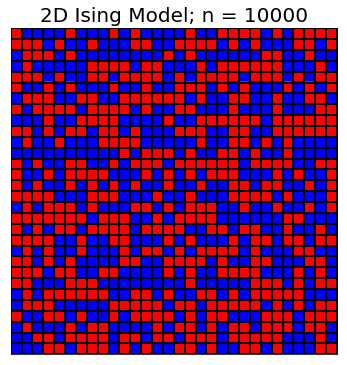

In [19]:
init = test[:,:]

random.seed(1)
solution = plot_met_ising(init, test_boltz, 1, 10000)

In [7]:
def plot_energy(init, boltz, J, n):
    """Plots evolution of energy for a 2D Ising grid"""

    X = np.shape(init)[1]
    Y = np.shape(init)[0]
    
    # set up the extra elements for periodic boundaries (might be faster to roll)
    grid = init[:,:]
    grid = np.insert(grid, 0, np.zeros(Y), axis = 1)
    grid = np.insert(grid, Y + 1, np.zeros(Y), axis = 1)
    grid = np.insert(grid, 0, np.zeros(X+2), axis = 0)
    grid = np.insert(grid, X + 1, np.zeros(X+2), axis = 0)
    
    # implement periodic boundary conditions
    grid[:,0] = grid[:,-2]
    grid[:,-1] = grid[:,1]
    grid[0,:] = grid[-2,:]
    grid[-1,:] = grid[1,:]
    
    # energy
    energy = ising_energy(grid, J)
    energy_list = [energy]
    
    # evolution
    for i in range(n):
        evo, d_energy, d_mag = metropolis_ising(grid, boltz, J)
        
        # increment energy
        energy += d_energy
        energy_list.append(energy)
    
        # reset iteration variable
        grid = evo[:,:]

        # implement periodic BCs
        grid[:,0] = grid[:,-2]
        grid[:,-1] = grid[:,1]
        grid[0,:] = grid[-2,:]
        grid[-1,:] = grid[1,:]
    
    # plotting
    x_axis = [i/n for i in range(n+1)]
    
    plt.figure(figsize=(6,6))
    plt.plot(x_axis,energy_list)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('Sweeps', fontsize=20)
    plt.ylabel('Energy', fontsize=20)
    plt.title(f'Energy of Ising Grid', fontsize=20)
    
    return energy_list


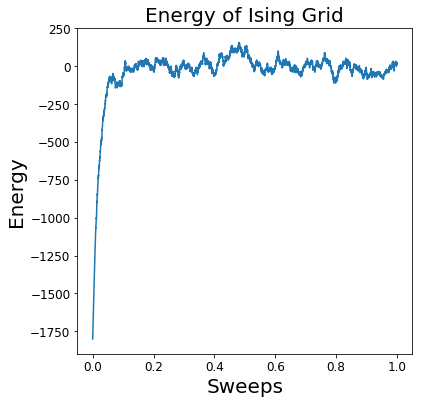

In [15]:
init = test[:,:]


random.seed(1)
e_list = plot_energy(init, test_boltz, 1, 10000)

In [17]:
def plot_magps(init, boltz, J, n):
    """Plots evolution of magnetization per spin for a 2D Ising grid"""

    X = np.shape(init)[1]
    Y = np.shape(init)[0]
    
    # set up the extra elements for periodic boundaries (might be faster to roll)
    grid = init[:,:]
    grid = np.insert(grid, 0, np.zeros(Y), axis = 1)
    grid = np.insert(grid, Y + 1, np.zeros(Y), axis = 1)
    grid = np.insert(grid, 0, np.zeros(X+2), axis = 0)
    grid = np.insert(grid, X + 1, np.zeros(X+2), axis = 0)
    
    # implement periodic boundary conditions
    grid[:,0] = grid[:,-2]
    grid[:,-1] = grid[:,1]
    grid[0,:] = grid[-2,:]
    grid[-1,:] = grid[1,:]
    
    # magnetization
    mag = np.sum(grid)
    mag_list = [mag/n]
    
    # evolution
    for i in range(n):
        evo, d_energy, d_mag = metropolis_ising(grid, boltz, J)
        
        # increment magnetization
        mag += d_mag
        mag_list.append(mag)
    
        # reset iteration variable
        grid = evo[:,:]

        # implement periodic BCs
        grid[:,0] = grid[:,-2]
        grid[:,-1] = grid[:,1]
        grid[0,:] = grid[-2,:]
        grid[-1,:] = grid[1,:]
    
    # plotting
    x_axis = [i/n for i in range(n+1)]
    
    plt.figure(figsize=(6,6))
    plt.plot(x_axis,mag_list)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('Sweeps', fontsize=20)
    plt.ylabel('Magnetization per Spin', fontsize=20)
    plt.title(f'Magnetization per Spin of Ising Grid', fontsize=20)
    
    
    return mag_list

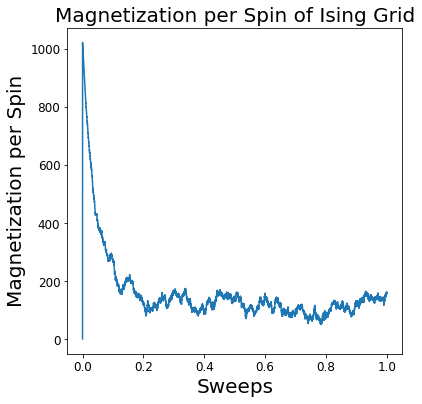

In [18]:
random.seed(1)
m_list = plot_magps(init, test_boltz, 1, 10000)

In [25]:
def spec_heat_ps(energy_list, T, N):
    """Compute the specific heat per spin for an input list of energy values at temperature T and lattice sites N"""
    
    moment_1 = np.sum(energy_list)/len(energy_list)
    moment_2 = np.sum([i**2 for i in energy_list])/len(energy_list)
    
    c = (1/(T**2 * N)) * (moment_2 - moment_1**2)
    
    return c

In [24]:
def sus(mag_list, T, N):
    """Compute susceptibility for an input list of mag per spin values at temperature T and lattice sites N"""
    
    moment_1 = np.sum(mag_list)/len(mag_list)
    moment_2 = np.sum([i**2 for i in mag_list])/len(mag_list)
    
    chi = (N/T) * (moment_2 - moment_1**2)
    
    return chi

In [31]:
# c_list is a list of specific heats per spin computed at the evenly-spaced, ascending order temperatures on temp_list
#s_0 is the entropy per spin at the the minimum of temp_list 
def ent_ps(temp_list, c_list, s_0):
    """Compute the entropy of an Ising lattice using the trapezoidal rule for a given set of temperatures and c"""
    
    dT = temp_list[1] - temp_list[0]
    n = len(temp_list)
    
    # compute the boundary terms
    t_min = t[0]
    t_max = t[-1]
    
    c_1 = c_list[0]
    c_2 = c_list[-1]
    
    boundary = (c_2/t_max + c_1/t_min)
    
    
    # initialize the integral sum
    integral = boundary
    
    for i in range(1,n-1):
        integral += c_list[i]/temp_list[i]
        
    integral = integral*dT
    
    # include the integration constant
    s = s_0 + integral
    
    return s
    